In [3]:
import numpy as np
import utils
import systems
import local_linear
import copy
import os 
import matplotlib.pyplot as plt
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


In [4]:
PreT = 5000
DT=0.1
N = 3  # Number of variables
substeps=1
num = 200
f = lambda x: systems.lorentz(0,x)

state = 3*np.random.randn(1,3)

#get on the attractor
#path = []
for i in range(PreT):
    state,_ = utils.step(state,f,DT)
#    path.append(copy.copy(state))
#path = np.stack(path)
#utils.plt3(path)



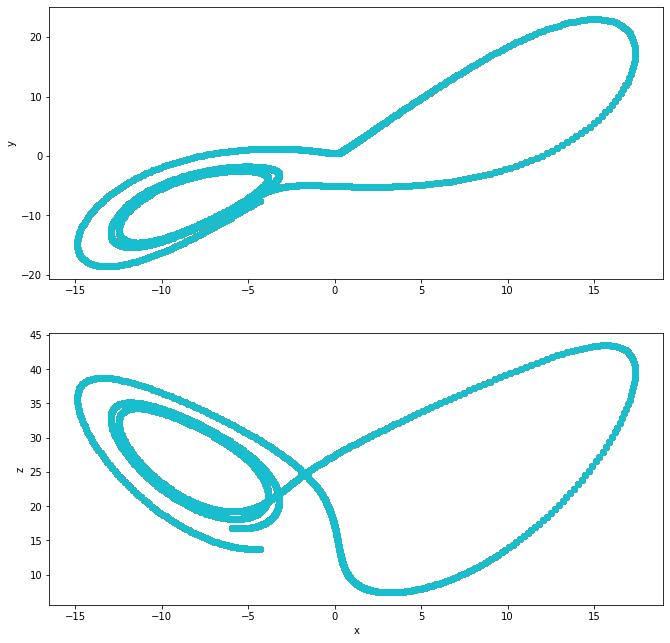

In [5]:
T = 1200
DT = 0.0025

spread = .00001
states = spread*np.random.randn(num,N)+state



#initializing variables
X = np.zeros((T,num,N))
RX = np.zeros((T,num,N))
#JX = np.zeros((T,num,N,N))
rotation_manager = utils.rot_keeper(d=N)
allRots = np.zeros((T,N,N))
allG = np.zeros((T,N-1,N-1))
allOmega = np.zeros((T,N))

for i in range(T):
    states, ds = utils.step(states,f,DT)
    X[i] = states
    allRots[i] = rotation_manager.get_rot(ds)
    RX[i] = (allRots[i]@(states-states[0]).T).T

utils.plt3(X)

In [6]:
a,aa=local_linear.local_linear(X,l_frame=3,verify=False,rot=True)

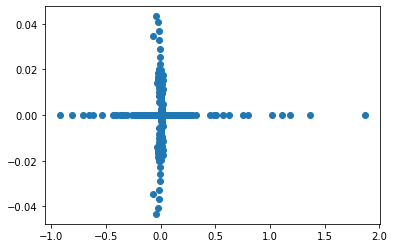

In [9]:
vs = []
ss = []
for A in a: 
    v,_ = np.linalg.eig(A[1:,1:])
    vs.append(copy.copy(v))
    ss.append(np.log(np.linalg.svd(A[1:,1:],True,False)))
plt.figure()
plt.scatter(np.real(vs),np.imag(vs))#,c=np.arange(len(vs),0.333))
plt.show()
vs = np.stack(vs)

In [16]:
ky = []
for s in ss:
    ky.append(2+np.max(s)/np.abs(np.min(s)))
np.mean(ky)

1.6795946316827948

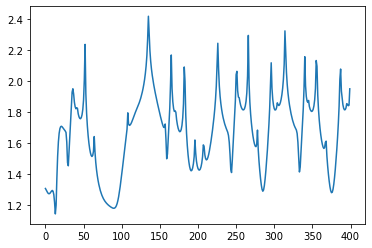

In [18]:
plt.plot(ky)
plt.show()